# Cognitive Neuroscience: Group Project

## Final Group Project Code Instructions

Marijn van Wingerden, Department of Cognitive Science and Artificial Intelligence – Tilburg University Academic Year 2020-2021

In this Jupyter Notebook, you will find the programmatic instructions to complete the Group Project. 

You will analyse a subset of the trials and conditions from the RITA dataset, as introduced by dr. Roncaglia in the second week of class. Your time-resolved analysis, using the FFT and baseline averaging, will be performed across ALL subjects in a group (Monolinguals, Early Learners, Late Learners) in the dataset, and look for oscillatory activity in relation to the onset of the **critical item** in each sentence (the auxilary verb).

You will inspect activity in the following frequency bands:
- Delta (1-4 Hz)
- Theta (4-8 Hz)
- Alpha (8-12 Hz)
- Beta (15-25 Hz)
- low Gamma (30-60 Hz)
- high Gamma (60-100 Hz)
(different cutoffs points can be found in the literature, we are sticking with these for convenience)

All relevant methods have been covered in Worksheets 1-7, with the exception of loading multiple datafiles. Whenever a new method/function is introduced here, it will come with an example.


## Datafiles - assignment per group

Each group will analyze one set of filler sentences (NA: Non-Ambiguous sentences) and a set of experimental sentences (AM: Ambiguous sentences). The conditions in the dataset are split over groups in the following way:

- SF: subject-first
- OF: object-first
- IR: irregular rhythm
- RR: regular rhythm

- Monolinguals: RM
    - Groups 01 + 02: SFIR triggers XX1 and XX5
    - Groups 03 + 04: SFRR triggers XX2 and XX6
    - Groups 05 + 06: OFIR triggers XX3 and XX7
    - Groups 07 + 08: OFRR triggers XX4 and XX8
- Early Learners: RB
    - Groups 09 + 10: SFIR triggers XX1 and XX5
    - Groups 11 + 12: SFRR triggers XX2 and XX6
    - Groups 13 + 14: OFIR triggers XX3 and XX7
    - Groups 15 + 16: OFRR triggers XX4 and XX8
- Late Learners: RL
    - Groups 17 + 18: SFIR triggers XX1 and XX5
    - Groups 19 + 20: SFRR triggers XX2 and XX6
    - Groups 21 + 22: OFIR triggers XX3 and XX7
    - Groups 23 + 24: OFRR triggers XX4 and XX8

- Odd groups:
analyse the odd trials in the dataset
- Even groups:
analyse the even trials in the dataset

You can download the datafiles from: https://surfdrive.surf.nl/files/index.php/s/JcA9speED020q4p


## Handing in of your code

You can adapt this script template and hand it in as the code component of your Group Assignment Report.

Whenever you are asked to make a plot, it should be completed with a meaningful plot title, xlabel and ylabel texts. Figures are started with a Matplotlib figure handle: "fig_Q2A, ax = plt.subplots;". This indicates that a link (called handle) to your figure will be saved in the variable, so we can easily check it when checking your scripts. Whenever a naming convention for a variable is given, use it, because it will allow semi-automatic grading of your project script.

### Intermediate hand-in

You will be able to hand in a script/notebook with your solutions to Q1-3 after the midterms, and the correct solution will be discussed in class to give you some feedback on how the Group Project is evaluated. Groups that do not hand in their solutions to Q1-3 will receive half of the total points available for these questions by default. 

## Group members:

Please list the contributors and their U-numbers here in comments:

- 
-
- 
- 
- 

## Setting up: list your modules to import
For loading/saving puroposes, we will make use of the **os** package.
An example worksheet with instructions on how to use the os package will be provided

In [2]:
%matplotlib notebook

import os
import numpy as np
from pprint import pprint
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.fft as fft

## Data loading
We will need to load the datafiles from all participants and add them all together so that we end up with a matrix that has nChannels x nTime x nParticipants (instead of trials). You can make your work easier by organising the datafiles in such a way that you put the control.npy files in their own subdirectory, and the experimental.npy files as well. 

In order to load the files, we can use the os package.

Adapt the following so that it works on your machine:

In [10]:
path_control =  './group_12_control'
path_experimental =  './group_12_experimental'
path_base = './'
files = os.listdir(path_base)
control_files = list()
experimental_files = list()

for f in files:
    print(f)
	# check the files that end with specific extention 
    #if f.rfind("group_12") > -1: # put this in here to allow to exclude some datafiles if needed
      #  continue
    if f.endswith("control.npy"):
        control_files.append(f)
    elif f.endswith("experimental.npy"):
        experimental_files.append(f)
            

# check that the length of your files list matches the provided datafiles, and contains only .npy datafiles

control_files.sort()
pprint(control_files)
print(len(control_files))
experimental_files.sort()
pprint(experimental_files)
print(len(experimental_files))

(1) Bonnefon et al Autonomous Vehicles Need Experimental Phil.pdf
(2) Engelen and Sie - Why Ethical Reflection Matters.pdf
.ipynb_checkpoints
.NightClubModel - Completebehavcior-fixedInfected.tmp.nlogo
092549279502634A.bib
092549279502634A.txt
1 Hour Studio Ghibli Lofi Hip Hop Mix.mp3
10 - regression with polynomials 10112020.R
10.3389-fpsyg.2019.01513-citation.bib
11 - mixed models 112218.R
12 - growth curve modeling 11242020.R
12 - Growth Curve Modeling-Mixed Models - Stats 2 CSAI 11242020.pdf
1920-summary-multi-agent-systems-1_34369_1601389083.pdf
1920-summary-multi-agent-systems-1_35592_1606780327.pdf
2020 CourseGuide HCI.pdf
2020 HCI group project.pdf
2020-11-03 15-48-52_Trim.mp3
2020-11-09 01-30-24.mp3
2020_HCI_Week_2_Principles_of_HCI.pdf
2117.jpg
22261400.nbib
6 - More Regression and Assumptions - Stats 2 CSAI 10072020.pdf
7z1900-x64.exe
8 - multiple regression interactions 10272020.R
9 - multiple regression categories 11032020.R
A-Tone-His_Self-1266414414.mp3
Abel Tasmanstraat

## Combining data and matrix pre-allocation
next, you will need to load these files one by one and extract the data for this participant. 
The data in the NumPy arrays are stored as Trials x Channels x Time. To aggregate across participants, you will thus need to add a 4th dimension to store the data.

To be able to adequately pre-allocate the data from the different subjects, we will load one trial subject manually to have a look at the shape/dimensionality of the data:

In [5]:
EEG = np.load(os.path.join(path_control,control_files[0]))
              
# control_files is a list of strings, so indexing its first element returns a string
# in this case, we are loading the first entry of control_files, i.e. participant 1

# verify that the number of trials equals 22, 
# verify that the number of channels equals 64 or 65 
# and verify that there are 751 samples per trace

print("Number of trials = ", EEG.shape[0])
print("Number of channels = ", EEG.shape[1])
print("Number of timepoints = ", EEG.shape[2])

IndexError: list index out of range

## Q1 - setting up the data structure and loading data from all participants

The EEG data is currently stored as a 3-dimensional NumPy array. But to run our time-frequency analysis, we need some more information like the sampling rate and the time axis that corresponds to the stimulus-locked analysis window. In order to set up (=pre-allocate) a matrix that will hold all traces for all participants, we need to know the sizes of the dimensions of this 4-dimensional matrix, and fill up this matrix by looping over participants:

In [30]:
# There are 64 or 65 channels in the dataset. Only channels up to channel 59 are EEG channels
# the remaining channels are EMG and EOG channels that we will ignore in this analysis
# subset your EEG array so that only the EEG channels remain

EEG = EEG[:,:59,:]
print(EEG.shape)

# Define nTrials, nChans (=channels), nSamples and nParts (=participants). Then, pre-allocate a matrix
# filled with zeros and with size nTrials x nChans x nSamples x nParticipants, one each for the control
# and experimental data. Name them comb_data_control and comb_data_experimental
nTrials = EEG.shape[0]
nChans = EEG.shape[1]
nSamples = EEG.shape[2]
nParts = len(control_files)
comb_data_control = np.zeros((nTrials , nChans, nSamples , nParts))
comb_data_experimental = np.zeros((nTrials , nChans, nSamples , nParts))

# next, we need to loop over all participant datafiles and add them to the appropriate slice in your 4-D arrays
# For this, you need to use specific array indexing to indicate where in comb_data_(control/experimental)
# each participant's data needs to go. You can and should reuse the data-reading code above.

# loop over participants, and wihtin each iteration of the loop, load the
# next datafile and fill comb_data_(control/experimental) with the EEG traces (nTrials x nChans x nSamples)
# check the shape of the matrices after filling them

for iPart in range(len(control_files)):
    comb_data_control[:,:,:,iPart] = np.load(os.path.join(path_control,control_files[iPart]))[:,:59,:]
    comb_data_experimental[:,:,:,iPart] = np.load(os.path.join(path_control,experimental_files[iPart]))[:,:59,:]
print(comb_data_control.shape)
print(comb_data_experimental.shape)

(22, 59, 751)
(22, 59, 751, 26)
(22, 59, 751, 26)


## Q2 - explore the data

Let's explore this newly combined dataset a little bit. This collection of EEG traces in your dataset has been taken with a [-0.5s, 1s] window around the relevant event. What's more, each trace has been averaged to its baseline period, so that the mean amplitude should be 0 (with some rounding error). 

To verify, first, determine the mean for the time period of -0.5 to 0 seconds. Given that the srate = 500 Hz, the baseline period corresponds to the first 250 samples. We will work with only the control dataset (comb_data_control) in this exercise.
- subset your combined data to only the first 250 samples
- select a random participant and subset the data further to only this participant
- select a random EEG channel and subset the data further to only this channel

This should leave you with a nTrials x 250 (samples) matrix. Create a similar evoked matrix with the remainder of the samples. With these matrices, in a 1x3 subplot 
- plot the traces for all trials in the **baseline** matrix (use transpose if necessary).
    - the plot should have 250 samples on the x-axis, and nTrial number of lines
- calculate the mean for each trace (i.e., across the samples in a trace):
    - once for the baseline period
    - once for the remainder of the trial
- plot these values (N of these values should be nTrials, check this) in a histogram, each in their own subplot

Refer to Worksheet 1 for example uses of **np.mean**. np.std works in a similar way

(22, 59, 250, 26)
(22, 59, 250)
(22, 250)
(22, 59, 501, 26)
(22, 59, 501)
(22, 501)
(22,)
(22,)


<IPython.core.display.Javascript object>


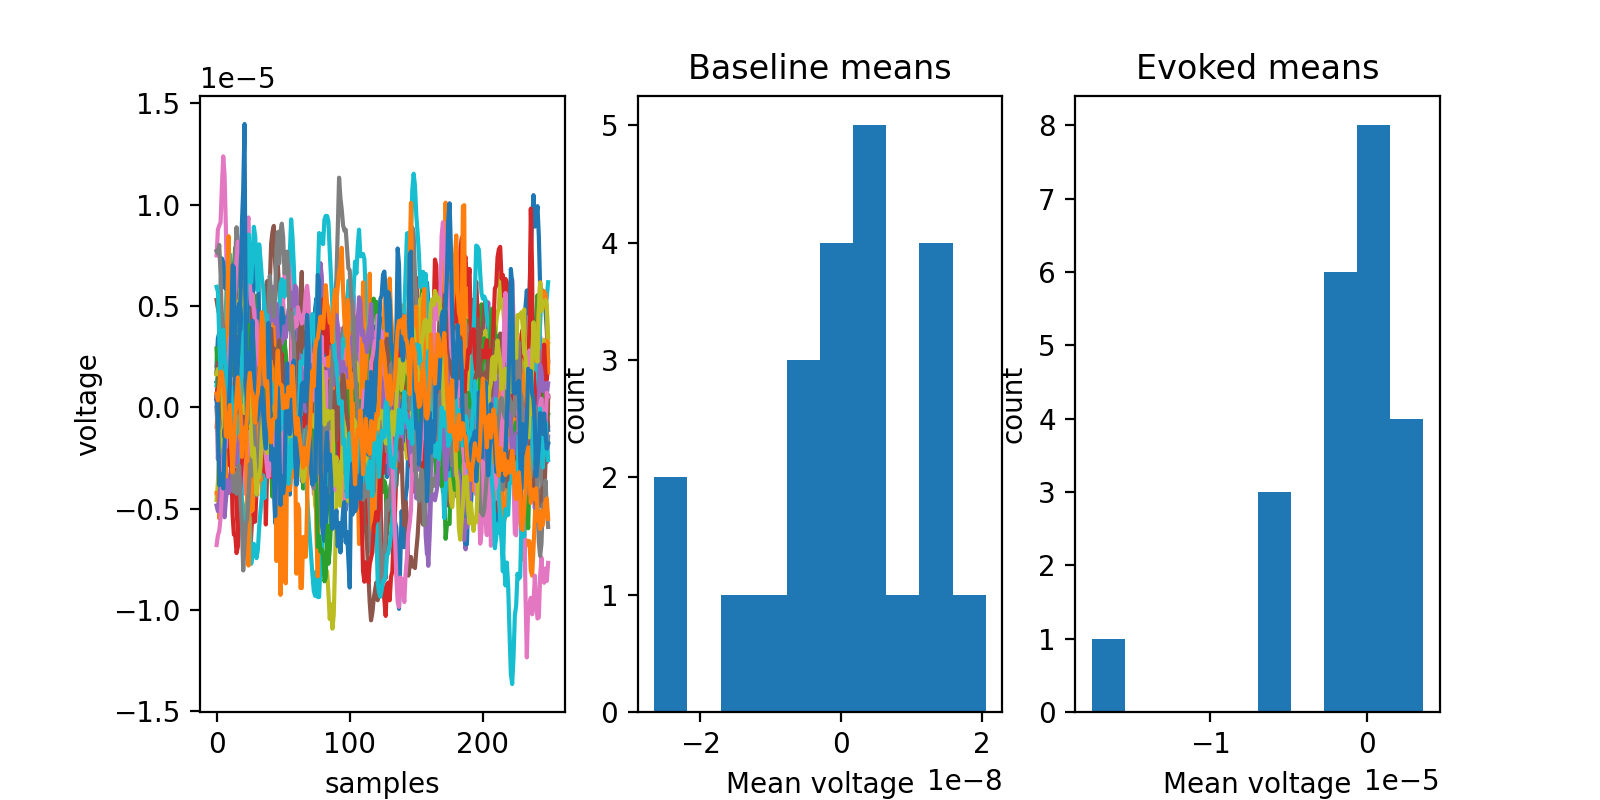

In [31]:
subset_baseline = comb_data_control[:,:,:250,:]
print(subset_baseline.shape) # trials x channels x timepoints x participants
subset_participant_baseline = subset_baseline[:,:,:,1]
print(subset_participant_baseline.shape) # trials x channels x timepoints
subset_channel_baseline = subset_participant_baseline[:,20,:]
print(subset_channel_baseline.shape) # trials x timepoints

subset_evoked = comb_data_control[:,:,250:,:]
print(subset_evoked.shape) # trials x channels x timepoints x participants
subset_participant_evoked = subset_evoked[:,:,:,1]
print(subset_participant_evoked.shape) # trials x channels x timepoints
subset_channel_evoked = subset_participant_evoked[:,20,:]
print(subset_channel_evoked.shape) # trials x timepoints

baseline_mean = np.mean(subset_channel_baseline, axis = 1) # take mean across samples
print(baseline_mean.shape)
evoked_mean = np.mean(subset_channel_evoked, axis = 1) # take mean across samples
print(evoked_mean.shape)

# now plot these traces and two histograms using the subplot given
fig_Q2A, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=3) # 1x3 graph

# plot the traces in ax[0]
ax[0].plot(np.transpose(subset_channel_baseline))
ax[0].set_xlabel("samples")
ax[0].set_ylabel("voltage")
plt.title("EEG traces in baseline period")

# plot the baseline mean in ax[1] with this code
ax[1].hist(baseline_mean)
plt.axes(ax[1])
plt.title('Baseline means')
ax[1].set_xlabel('Mean voltage')
ax[1].set_ylabel('count')

# plot the evoked mean in ax[2] with this code
ax[2].hist(evoked_mean)
plt.axes(ax[2])
plt.title('Evoked means')
ax[2].set_xlabel('Mean voltage')
ax[2].set_ylabel('count')
plt.show()

Looking at theses histograms, you should see that the distribution of evoked mean values can vary: while EEG recordings are referenced to a common ground, and usualy then re-referenced to the global average, we are dealing here with specific cutouts of EEG traces around specific events in the dataset. The data has been normalised to the baseline window for each trial, but the mean of the evoked part is not controlled. In addition, there might be differences in the size of the amplitudes between channels and between participants due to differences in conductivity.

Illustrate that this global averaging does not guarantee equal variance. Reuse the baseline and evoked subsets:
- Compute, instead of the mean across samples, the standard deviation (numpy.std or variants)
- calculate the standard deviation for each trace:
    - once for the baseline period
    - once for the remainder of the trial
- Adapt the plotting code for Q2A and plot these distributions of standard deviations in figure Q2B.

(22,)
(22,)


<IPython.core.display.Javascript object>


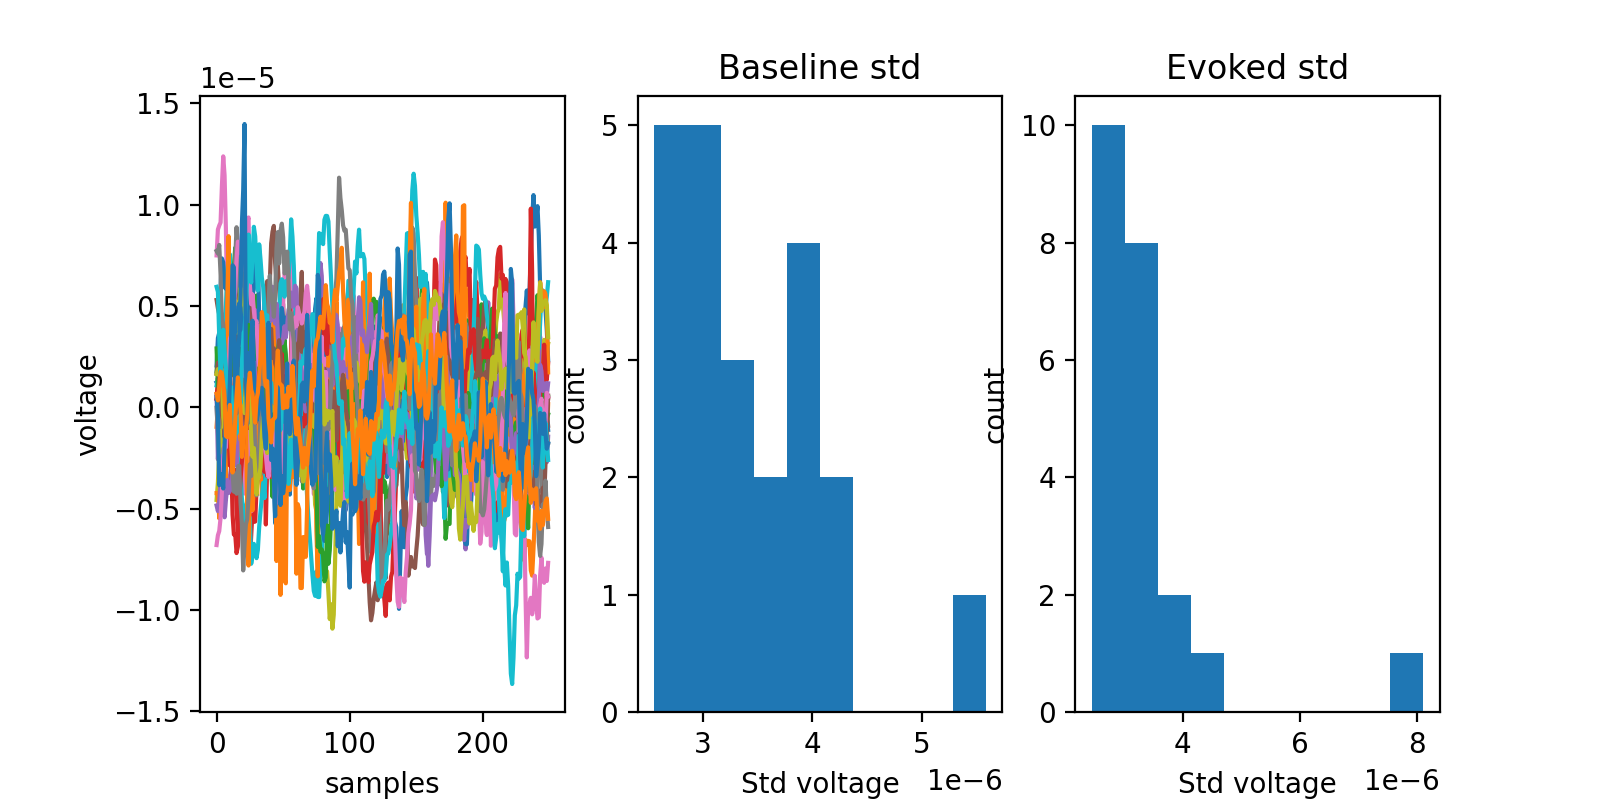

In [32]:
baseline_std = np.std(subset_channel_baseline, axis = 1) # take std across samples
print(baseline_std.shape)
evoked_std = np.std(subset_channel_evoked, axis = 1) # take std across samples
print(evoked_std.shape)

fig_Q2B, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=3) # don't forget proper plot annotation

# plot the traces in ax[0]
ax[0].plot(np.transpose(subset_channel_baseline))
ax[0].set_xlabel("samples")
ax[0].set_ylabel("voltage")
plt.title("EEG traces in baseline period")

# plot the baseline mean in ax[1] with this code
ax[1].hist(baseline_std)
plt.axes(ax[1])
plt.title('Baseline std')
ax[1].set_xlabel('Std voltage')
ax[1].set_ylabel('count')

# plot the evoked mean in ax[2] with this code
ax[2].hist(evoked_std)
plt.axes(ax[2])
plt.title('Evoked std')
ax[2].set_xlabel('Std voltage')
ax[2].set_ylabel('count')
plt.show()



## Q3 - normalizing the data

So, if there are large differences in mean and/or standard deviation between channels or participants, we can implement some standard scaling. First, let think about why this "standard scaling" (substracting the mean, dividing by std) is important? You will be combining data from different participants for these exercises. They have been possibly recorded at different days, with different gels or electrodes, and thus with different conductivity between participants. We will assume that the recording across trials within one participant remains stable. So, in order to compare and average the recordings from different participants "fairly", we want them to be on more or less the same scale.

We can thus attempt to normalize the signal per participant, by dividing all data per participant by its standard deviation. Let's show the extent of the problem by plotting the participants with the lowest and highest std side by side. Re-create your matrix of std values for the evoked period, but:
- do not subset one participant, but retain all participants (still only selecting 1 channel)
- calculate the standard deviation for each trace (across the samples dimension)
- average the std values for each trace over trials, save in part_std 
    - you will retain one value per participant, check this
- use np.argmax (and variants) to create two indexes, min_std and max_std that point to the participants with the lowest and highest standard deviations
- calculate and plot the signal average over trials for these two participants, using different line colors and proper line labeling. 
    - Plot them in the first subplot of a 1x2 subplot
- Observe the scaling difference




(22, 501, 26)
(22, 26)
(26,)
Participants with min_std:  15
Participants with max_std:  20


<IPython.core.display.Javascript object>


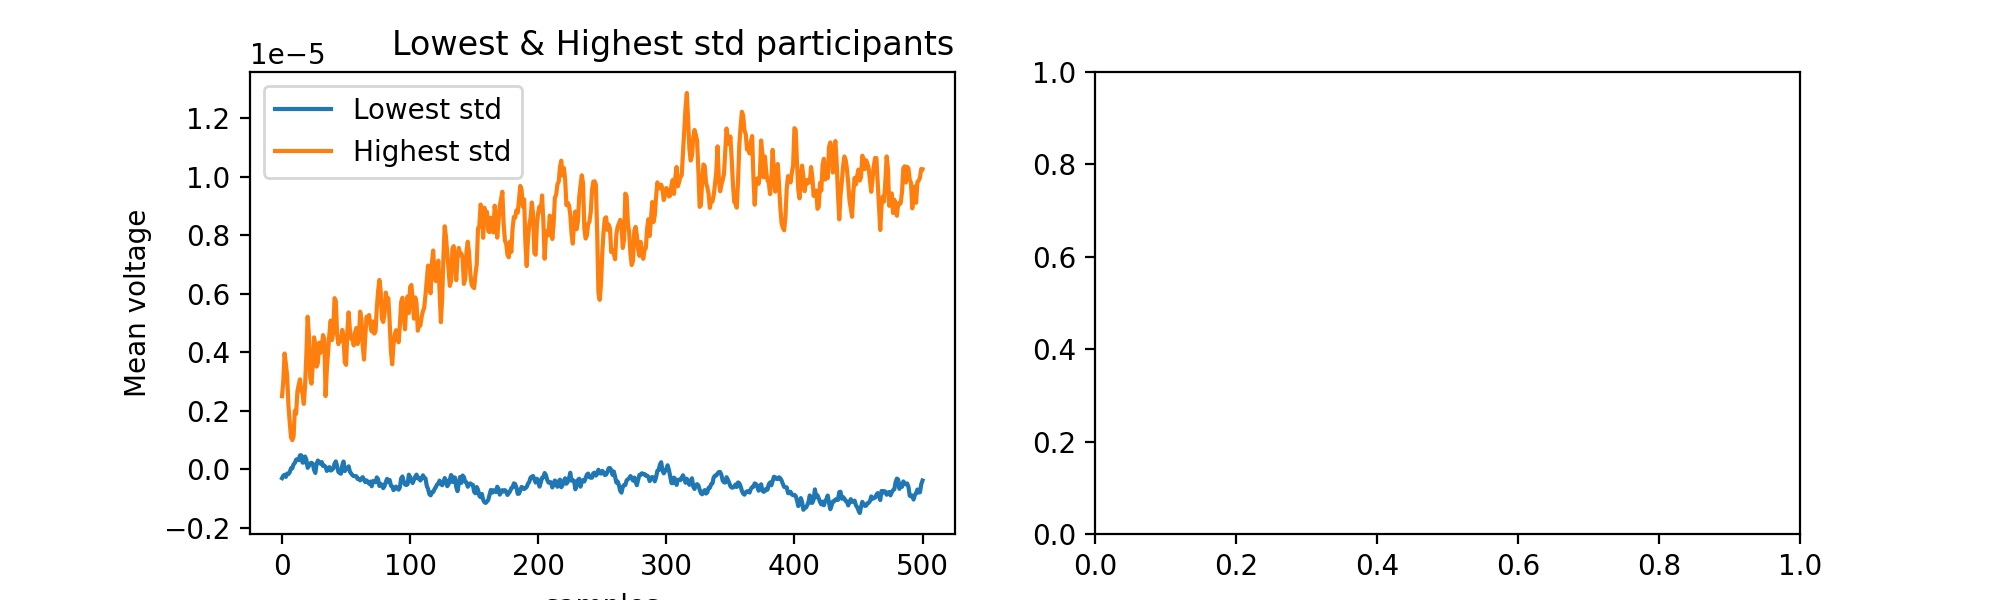

In [33]:
selected_channel = subset_evoked[:,20,:,:]
print(selected_channel.shape)
part_std_all = np.std(selected_channel, axis=1) # we take the std across the second dimension (samples)
print(part_std_all.shape)

part_std = np.mean(part_std_all, axis = 0) # from these, we average across trials
print(part_std.shape)

min_std = np.argmin(part_std,axis=0)
max_std = np.argmax(part_std,axis=0)
print("Participants with min_std: ", min_std)
print("Participants with max_std: ", max_std)

fig_Q3, ax = plt.subplots(figsize=(10,3), nrows = 1, ncols = 2) # don't forget proper plot annotation
ax[0].plot(np.mean(selected_channel[:,:,min_std], axis = 0), label = "Lowest std")
ax[0].plot(np.mean(selected_channel[:,:,max_std], axis = 0), label = "Highest std")
ax[0].legend(loc = 'upper left')
plt.axes(ax[0])
plt.title('Lowest & Highest std participants', loc = 'right')
ax[0].set_xlabel('samples')
ax[0].set_ylabel('Mean voltage')
plt.show()

Next, we want to use the standard deviation for these participants to normalize (i.e. divide) the data by this value. 
- using the selected channel matrix for these two participants as calculated above
    - this should be a trials x timepoints matrix, per participant
    - store as low_std_participant and high_std_participant
- extract the standard deviation for these participant as calculated above
- Normalize both sets traces (per participant) by the participant std
    - save as low_std_norm and high_std_norm
- In the second subplot, plot the **normalized** average signal over trials for these same two participants, using different line colors and proper line labeling. You can replot the figure if you want.
    - Plot them in the second subplot of fig Q3
    - The data should now be more or less on the same scale

(22, 501)
(22, 501)


<IPython.core.display.Javascript object>


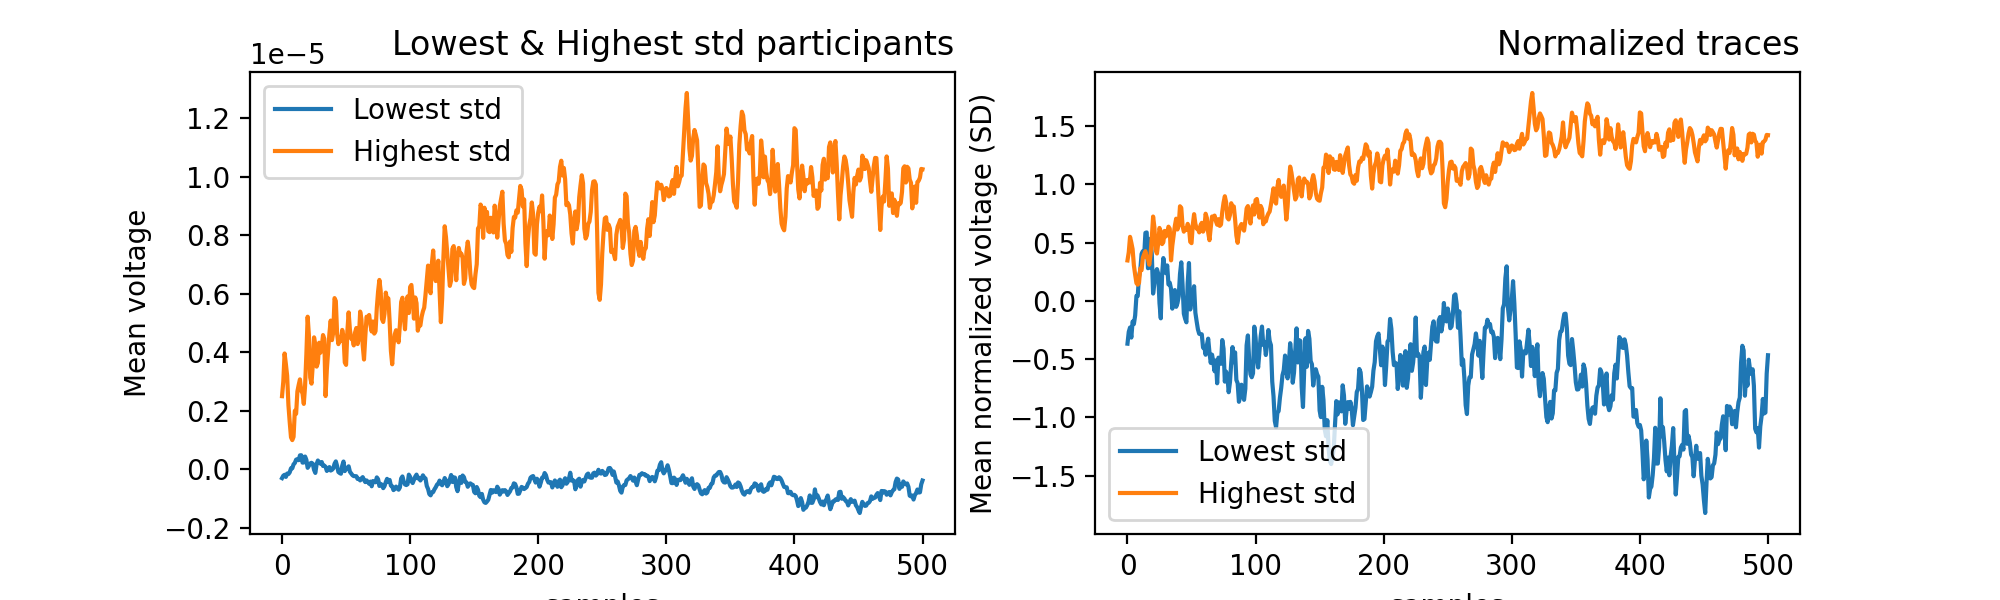

In [34]:
low_std_part = selected_channel[:,:,min_std] # select data from participant with lowest std
low_std_norm = low_std_part / part_std[min_std] # divide by the average std for this participant
print(low_std_norm.shape) # trials x timepoints

high_std_part = selected_channel[:,:,max_std] # select data from participant with highest std
high_std_norm = high_std_part / part_std[max_std] # divide by the average std for this participant
print(high_std_norm.shape) # trials x timepoints

fig_Q3, ax = plt.subplots(figsize=(10,3), nrows = 1, ncols = 2) # don't forget proper plot annotation
ax[0].plot(np.mean(selected_channel[:,:,min_std], axis = 0), label = "Lowest std")
ax[0].plot(np.mean(selected_channel[:,:,max_std], axis = 0), label = "Highest std")
ax[0].legend(loc = 'upper left')
plt.axes(ax[0])
plt.title('Lowest & Highest std participants', loc = 'right')
ax[0].set_xlabel('samples')
ax[0].set_ylabel('Mean voltage')

ax[1].plot(np.mean(low_std_norm, axis = 0), label = "Lowest std")
ax[1].plot(np.mean(high_std_norm, axis = 0), label = "Highest std")
ax[1].legend(loc = 'lower left')
plt.axes(ax[1])
plt.title('Normalized traces', loc = 'right')
ax[1].set_xlabel('samples')
ax[1].set_ylabel('Mean normalized voltage (SD)')

plt.show()


We now have to apply this normalization across all channels. The fairest way is to calculate the grand standard deviation per participant (over all their channels, so the relative scaling between channels remains intact). This will normalize the range of the signal within one participant, so that they will be comparable between participants. We will have to do this both for the control and the experimental dataset.

In order to do this: 
- first preallocate two normalized matrices with the same size as comb_data_(control/experimental), called comb_data_norm_(control/experimental).
- Next, create a loop to go over Participants, and inside the loop:
    - select the data for the current participant (trials x channels x timepoints)
        - separately for the control and experimental datasets.
    - calculate the grand standard deviation per participant 
        - also separately for the control and experimental datasets
    - normalization all values by this grand standard deviation
        - Examine the numpy.std documentation to get a single std value across a 3D matrix
    - save the normalized data per participant in the pre-allocatede normalized matrix 
        - separately for control/experimental datasets


In [35]:
comb_data_norm_control = np.zeros(comb_data_control.shape)
comb_data_norm_experimental = np.zeros(comb_data_experimental.shape)

for iPart in range(len(control_files)):
    # control trials
    curr_dat = comb_data_control[:,:,:,iPart]
    curr_std = np.std(curr_dat)
    comb_data_norm_control[:,:,:,iPart] = comb_data_control[:,:,:,iPart]/curr_std # element-wise division
    # experimental trials
    curr_dat = comb_data_experimental[:,:,:,iPart]
    curr_std = np.std(curr_dat)
    comb_data_norm_experimental[:,:,:,iPart] = comb_data_experimental[:,:,:,iPart]/curr_std # element-wise division
    print("processing participant: ", iPart+1, "of ", len(control_files))
    


processing participant:  1 of  26
processing participant:  2 of  26
processing participant:  3 of  26
processing participant:  4 of  26
processing participant:  5 of  26
processing participant:  6 of  26
processing participant:  7 of  26
processing participant:  8 of  26
processing participant:  9 of  26
processing participant:  10 of  26
processing participant:  11 of  26
processing participant:  12 of  26
processing participant:  13 of  26
processing participant:  14 of  26
processing participant:  15 of  26
processing participant:  16 of  26
processing participant:  17 of  26
processing participant:  18 of  26
processing participant:  19 of  26
processing participant:  20 of  26
processing participant:  21 of  26
processing participant:  22 of  26
processing participant:  23 of  26
processing participant:  24 of  26
processing participant:  25 of  26
processing participant:  26 of  26


Finally, we will be plotting the raw and normalised datasets side by side to observe the differences. Before you starts, make sure you have two 4-dimensional matrices, one for the control data and one for the experimental data. Both should contain the full number of samples (e.g., baseline and evoked period). 

Create a 1x2 subplot, with on the left the raw data and on the right the normalised data
- re-use part of the code in Q2 to make a subset of the baseline data
- from this subset, select a random channel
- for both subsetted matrices, calculate the average signal over trials 
    - this should result in a nTimepoints x nParticipants 2D matrix
    - store as mean_baseline_raw and mean_baseline_norm
- Then, plot this average signal over time (as in Fig Q2A) in a 1x2 subplot
    - for the raw dataset in panel 0
    - for the normalised dataset in panel 1
- Save this figure as Figure1

(22, 59, 250, 26)
(250, 26)
(22, 59, 250, 26)
(250, 26)


<IPython.core.display.Javascript object>


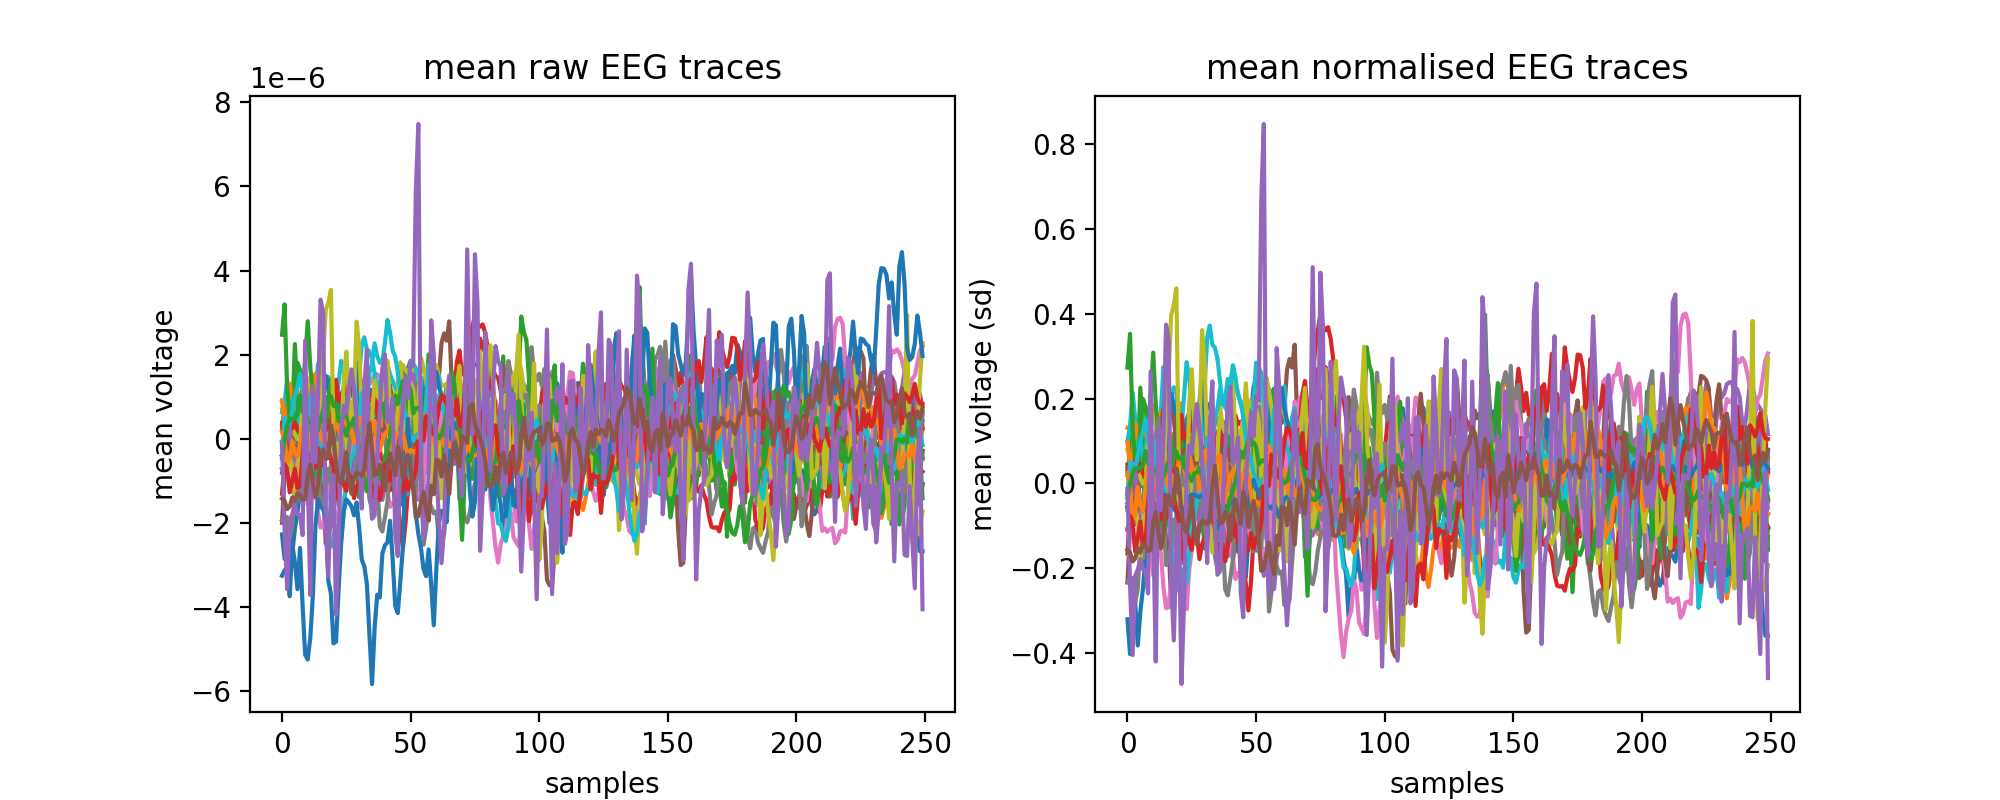

In [36]:
# non-normalised data
subset_baseline_raw = comb_data_control[:,:,:250,:]
print(subset_baseline_raw.shape) # trials x channels x timepoints x participants
subset_channel_baseline_raw = subset_baseline_raw[:,20,:,:]
mean_baseline_raw = np.mean(subset_channel_baseline_raw, axis = 0) # across trials
print(mean_baseline_raw.shape) # timepoints x participants

# normalised data
subset_baseline_norm = comb_data_norm_control[:,:,:250,:]
print(subset_baseline_norm.shape) # trials x channels x timepoints x participants
subset_channel_baseline_norm = subset_baseline_norm[:,20,:,:]
mean_baseline_norm = np.mean(subset_channel_baseline_norm, axis = 0) # across trials
print(mean_baseline_norm.shape) # timepoints x participants

# now plot the raw average traces and normalised average traces
fig_Q3C, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2) # 1x2 graph

# plot the mean raw traces in ax[0]
ax[0].plot(mean_baseline_raw)
ax[0].set_xlabel("samples")
ax[0].set_ylabel("mean voltage")
plt.axes(ax[0])
plt.title("mean raw EEG traces")

# plot the mean normalised traces in ax[1]
ax[1].plot(mean_baseline_norm)
plt.axes(ax[1])
plt.title("mean normalised EEG traces")
ax[1].set_xlabel('samples')
ax[1].set_ylabel('mean voltage (sd)')
plt.show()

# save Figure Q3C as your Figure 1 for your report
Figure1 = fig_Q3C

You should see that the scaling **within** a participant (line of across-trial average signal) is not really affected, but that potential outliers **between** participants have been brought into the same scale range. 

We are now done with pre-processing of the data and ready to commence the spectral analysis